# Image Classification using Deep Learning with SVM

### Udacity Machine Learning Engineer Nanodegree - Capstone Project
### Student: Pavlos Sakoglou

### Nude Detector Application using optimal model
=========================================================================================


#### Create a function with the following pre-conditions and post-conditions

1) Precondition: takes an image as input

2) Postconditions: returns a blurred image and the class name if the class is Nude, and returns the original picture with the class name otherwise.

3) Implementation: The function takes an image url or path as input, converts the image into a tensor, predicts the class as per the loaded model, and displays the picture and a corresponding message. If the picture is predicted as Nude, then the program displays a blurred image along with the message

#### Helper functions

In [1]:
from keras.preprocessing import image  
from keras.models import Sequential
from PIL import ImageFilter, Image
import numpy as np
import matplotlib.pyplot as plt  
import cv2  
%matplotlib inline  

### Convert image to RGB-valued tensor
def path_to_tensor(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    return np.vstack(np.expand_dims(x, axis=0))

def create_model():
    from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
    from keras.layers import Dropout, Flatten, Dense, Activation
    from keras.models import Sequential

    # CNN with sigmoid

    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(2, activation="sigmoid"))
    
    return model

def print_image(img):
    im = cv2.imread(img)
    cv_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow(cv_rgb)

Using TensorFlow backend.


#### The algorithm

In [2]:
def nude_detector(image_path):
    
    # Open the image
    im = Image.open(image_path)
    
    # Convert the image to tensor
    im_tensor = path_to_tensor(image_path).astype('float32')/255
    
    # Create the model and load the optimal weights
    model = create_model()
    model.load_weights('saved_models/weights.best.finalCNN.hdf5')

    # Make prediction
    prediction = np.argmax(model.predict(np.expand_dims(im_tensor, axis=0)))

    # Check the output
    if prediction:
        print_image(image_path)
        print("This image is Safe")
        return (im, "Safe")
    else:
        ### Blur 10 times!
        nude_image = im.filter(ImageFilter.GaussianBlur(radius=10))
        for i in range(0,9):
            nude_image = nude_image.filter(ImageFilter.GaussianBlur(radius=10))
        nude_image.save("nude_temp.jpg")
        print_image("nude_temp.jpg")
        print("This image contains nudity!")
        return (nude_image, "Nude")

===============================================================================

# Test the application

*These pictures are included in the **data/app_test** directory*

===============================================================================


## Test on absolutely Safe images

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1100x734 at 0x21D7C067C18>,
 'Safe')

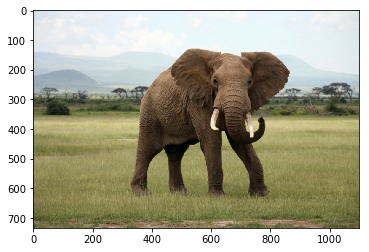

In [3]:
nude_detector("data/app_test/safe/safe (1).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=339x359 at 0x21D7D2E7320>,
 'Safe')

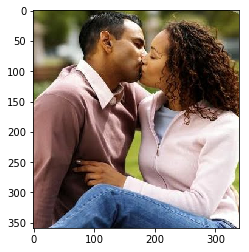

In [4]:
nude_detector("data/app_test/safe/safe (2).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=845x450 at 0x21D7D342DA0>,
 'Safe')

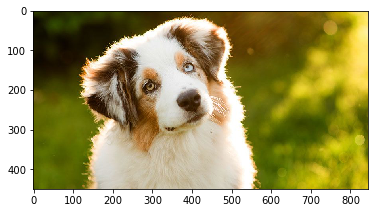

In [5]:
nude_detector("data/app_test/safe/safe (3).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=648x486 at 0x21D01BACCC0>,
 'Safe')

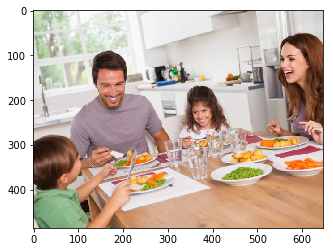

In [6]:
nude_detector("data/app_test/safe/safe (4).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1598x1200 at 0x21D0121F550>,
 'Safe')

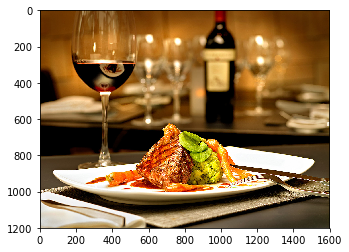

In [7]:
nude_detector("data/app_test/safe/safe (5).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3556x2000 at 0x21D01082908>,
 'Safe')

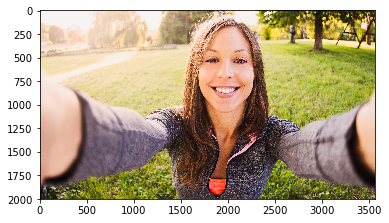

In [8]:
nude_detector("data/app_test/safe/safe (6).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=970x728 at 0x21D0132FF28>,
 'Safe')

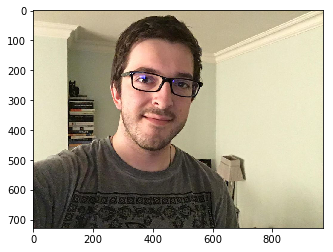

In [9]:
nude_detector("data/app_test/safe/safe (7).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=540x360 at 0x21D016B9BA8>,
 'Safe')

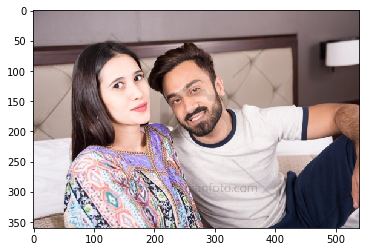

In [10]:
nude_detector("data/app_test/safe/safe (8).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=480x471 at 0x21D016D89E8>,
 'Safe')

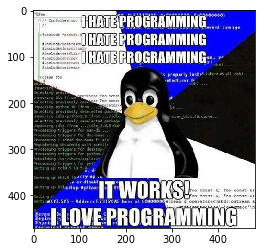

In [11]:
nude_detector("data/app_test/safe/safe (9).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=650x400 at 0x21D018ABFD0>,
 'Safe')

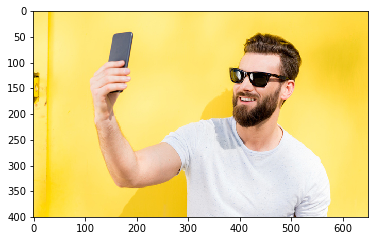

In [12]:
nude_detector("data/app_test/safe/safe (10).jpg")

As we can see, the algorithm does a good job detecting Safe images! 100% of our new samples were correctly classified as Safe!

## Test on ambiguous images

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=650x1000 at 0x21D01A64390>, 'Nude')

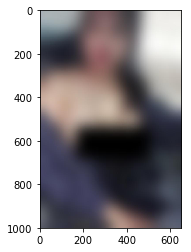

In [15]:
nude_detector("data/app_test/ambiguous/amb (1).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=453x503 at 0x21D01319588>,
 'Safe')

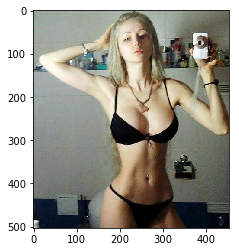

In [16]:
nude_detector("data/app_test/ambiguous/amb (2).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=960x1280 at 0x21D01F2AAC8>, 'Nude')

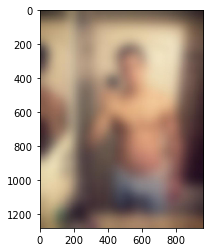

In [17]:
nude_detector("data/app_test/ambiguous/amb (3).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=634x917 at 0x21D023632E8>, 'Nude')

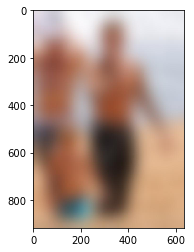

In [18]:
nude_detector("data/app_test/ambiguous/amb (4).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=634x718 at 0x21D0133A3C8>, 'Nude')

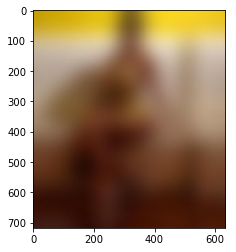

In [19]:
nude_detector("data/app_test/ambiguous/amb (5).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=576x856 at 0x21D032BC630>, 'Nude')

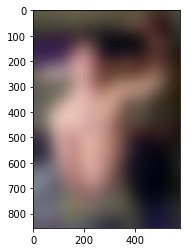

In [20]:
nude_detector("data/app_test/ambiguous/amb (6).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=620x413 at 0x21D035F7A90>, 'Nude')

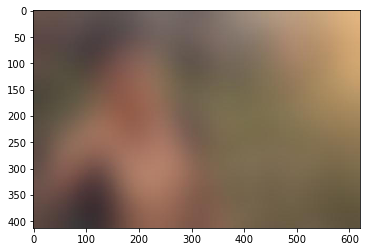

In [21]:
nude_detector("data/app_test/ambiguous/amb (7).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=600x900 at 0x21D0379C780>, 'Nude')

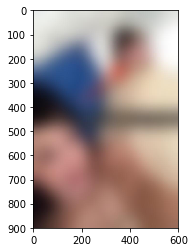

In [22]:
nude_detector("data/app_test/ambiguous/amb (8).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=618x618 at 0x21D038857B8>, 'Nude')

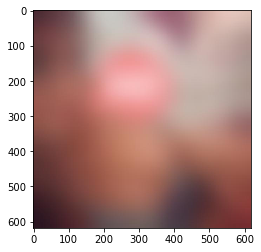

In [23]:
nude_detector("data/app_test/ambiguous/amb (9).jpg")

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=962x655 at 0x21D036A7F98>,
 'Safe')

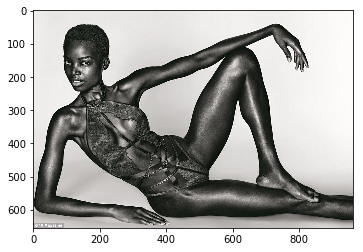

In [24]:
nude_detector("data/app_test/ambiguous/amb (10).jpg")

As we can see, our algorithm classifies 80% of the ambiguously nude images as Nude. This result is consistent with the results we got earlier. (recall of algorithm = 81%)

## Test on absolutely Nude images

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=494x700 at 0x21D04763BA8>, 'Nude')

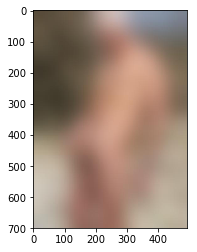

In [25]:
nude_detector("data/app_test/nude/n (1).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=600x900 at 0x21D04934B38>, 'Nude')

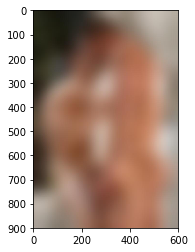

In [28]:
nude_detector("data/app_test/nude/n (2).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=600x800 at 0x21D04E6E6D8>, 'Nude')

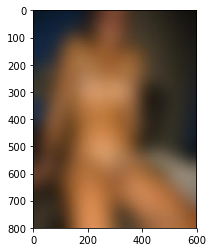

In [29]:
nude_detector("data/app_test/nude/n (3).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=2048x1331 at 0x21D0E376EB8>, 'Nude')

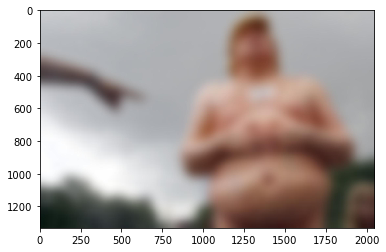

In [30]:
nude_detector("data/app_test/nude/n (4).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=600x800 at 0x21D023D47F0>, 'Nude')

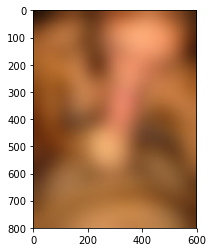

In [31]:
nude_detector("data/app_test/nude/n (5).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=320x418 at 0x21D0DEE0DA0>, 'Nude')

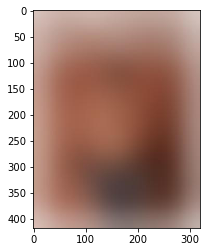

In [32]:
nude_detector("data/app_test/nude/n (6).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=736x819 at 0x21D0E264D30>, 'Nude')

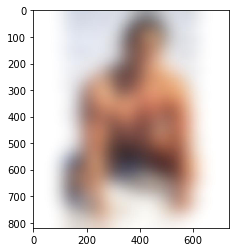

In [33]:
nude_detector("data/app_test/nude/n (7).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=500x667 at 0x21D0F343DA0>, 'Nude')

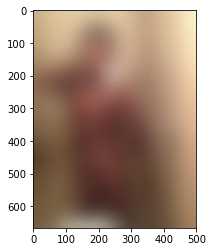

In [34]:
nude_detector("data/app_test/nude/n (8).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=634x500 at 0x21D0F4E7F98>, 'Nude')

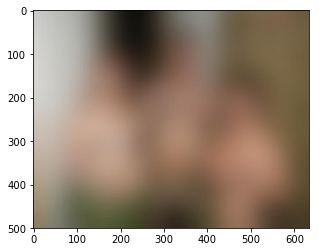

In [35]:
nude_detector("data/app_test/nude/n (9).jpg")

This image contains nudity!


(<PIL.Image.Image image mode=RGB size=736x819 at 0x21D0F8C45C0>, 'Nude')

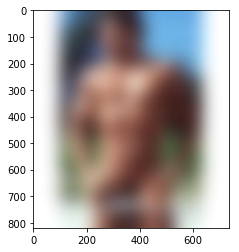

In [36]:
nude_detector("data/app_test/nude/n (10).jpg")

As we can see, our algorithms classifies correctly all of the absolutely Nude pictures. Under no circumstances their prediction label should be Safe, and our algorithm does a good job detecting their nudity!

## False Prediction Cases

Here we test some cases that our algorithm fails to predict correctly the class of the image. Nevertheless, we observe that the false predictions are not necessarily false, but depends on who you ask. Some people have higher tolerance of nudity than others. However, the algorithm fails to generalize and detect nude and non nude features in the below cases:

This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=550x825 at 0x21D0F7C66D8>,
 'Safe')

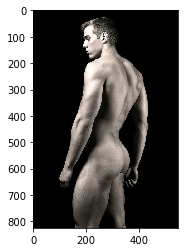

In [37]:
nude_detector("data/app_test/false_pred/fp (1).jpg")

Original Picture


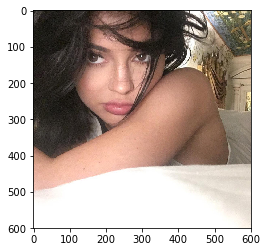

In [40]:
print("Original Picture")
print_image("data/app_test/false_pred/fp (2).jpg")

False Prediction!
This image contains nudity!


(<PIL.Image.Image image mode=RGB size=600x600 at 0x21D12D93BA8>, 'Nude')

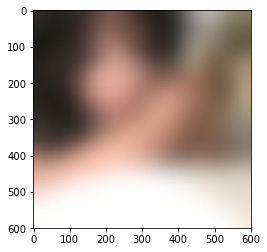

In [41]:
print("False Prediction!")
nude_detector("data/app_test/false_pred/fp (2).jpg")

False Prediction!
This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=634x637 at 0x21D15BF82B0>,
 'Safe')

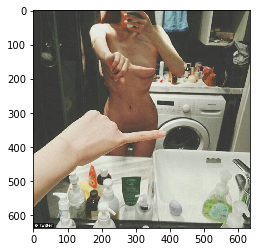

In [43]:
print("False Prediction!")
nude_detector("data/app_test/false_pred/fp (3).jpg")

Original Picture


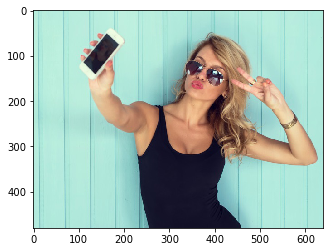

In [45]:
print("Original Picture")
print_image("data/app_test/false_pred/fp (4).jpg")

False Prediction!
This image contains nudity!


(<PIL.Image.Image image mode=RGB size=640x480 at 0x21D1B10CF98>, 'Nude')

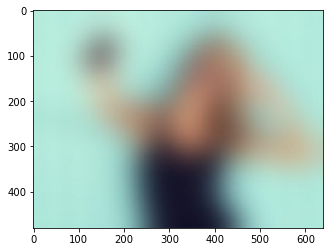

In [46]:
print("False Prediction!")
nude_detector("data/app_test/false_pred/fp (4).jpg")

False Prediction!
This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=306x501 at 0x21D12C4FA58>,
 'Safe')

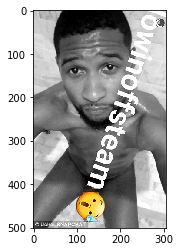

In [48]:
print("False Prediction!")
nude_detector("data/app_test/false_pred/fp (5).jpg")

Original Picture


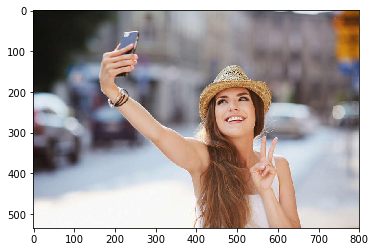

In [50]:
print("Original Picture")
print_image("data/app_test/false_pred/fp (6).jpg")

False Prediction!
This image contains nudity!


(<PIL.Image.Image image mode=RGB size=800x534 at 0x21D15E642E8>, 'Nude')

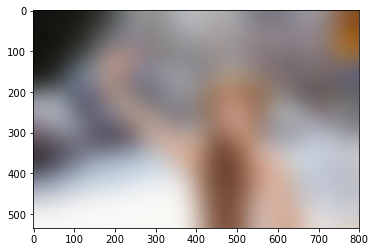

In [51]:
print("False Prediction!")
nude_detector("data/app_test/false_pred/fp (6).jpg")

False Prediction!
This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=868x597 at 0x21D12E8ECF8>,
 'Safe')

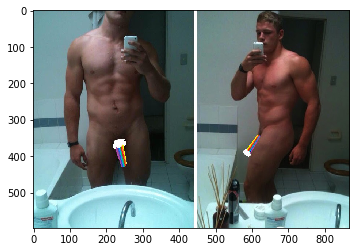

In [52]:
print("False Prediction!")
nude_detector("data/app_test/false_pred/fp (7).jpg")

Original Picture


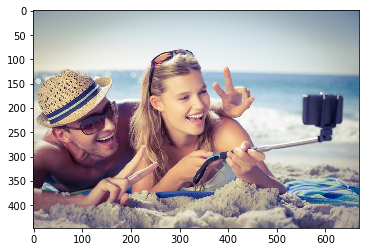

In [54]:
print("Original Picture")
print_image("data/app_test/false_pred/fp (8).jpg")

False Prediction!
This image contains nudity!


(<PIL.Image.Image image mode=RGB size=670x447 at 0x21D1CCC7E80>, 'Nude')

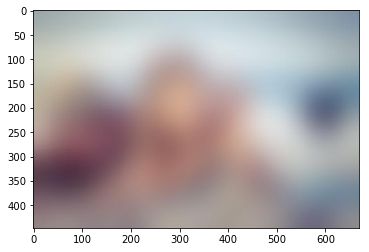

In [55]:
print("False Prediction!")
nude_detector("data/app_test/false_pred/fp (8).jpg")

Correct Prediction!
This image is Safe


(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=960x644 at 0x21D1CD7D470>,
 'Safe')

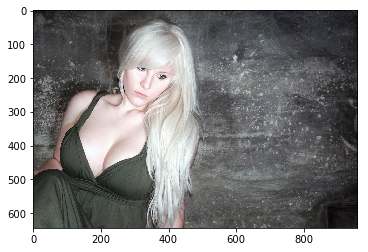

In [57]:
print("Correct Prediction!")
nude_detector("data/app_test/false_pred/fp (9).jpg")

Original Picture


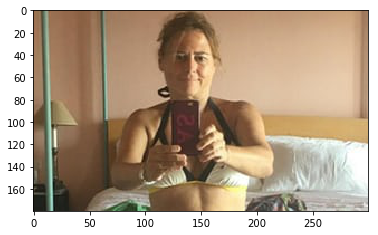

In [59]:
print("Original Picture")
print_image("data/app_test/false_pred/fp (10).jpg")

False Prediction!
This image contains nudity!


(<PIL.Image.Image image mode=RGB size=300x180 at 0x21D1CA7E668>, 'Nude')

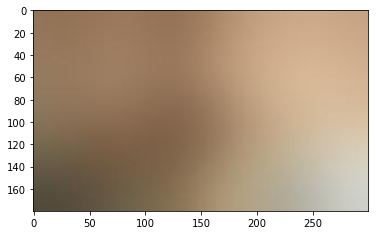

In [60]:
print("False Prediction!")
nude_detector("data/app_test/false_pred/fp (10).jpg")

As you can see, the last two pictures are both revealing skin however in the second to last case the algorithm does a good job recognizing it, but in the last case the algorithm generalizes the picture as Nude, just to be safe. This is not necessarily a bad thing for our purposes. 

As a result, the algorithm does a good job overall and the mistakes that occur are oftentimes open to debate as per their class.